# Разведочный анализ (EDA) результатов по вакантности

Строим некоторые графики, смотрим, что получилось.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
vacant = pd.read_csv("data/vacant_v2.csv")
vacant.head(2)

,house_id,houseguid,exploitation_start_year,living_quarters_count,area_residential,address,lat,lon,mun_obr,total_ppl,n_rooms,n_flats,ppf,sheet_name,ppl,expected_total_ppl,house_ppf,vacant_flats_count,vacant_flats_share
0,7847597,8425ff55-ec42-466a-a993-de4e5faaba3b,1957.0,249.0,16649.1,"г. Москва, ул. 1812 года, д. 1",55.734999,37.524101,район Дорогомилово,629.0,3,135.725410,4.070183,Дорогомилово,552.427272,1055.679393,4.239676,101.0,0.405622
1,7847598,a8ad9e0b-e0c1-46a7-981c-4d5a598c76ce,1954.0,325.0,21341.9,"г. Москва, ул. 1812 года, д. 2",55.736789,37.524575,район Дорогомилово,835.0,3,179.102167,4.070183,Дорогомилово,728.978618,1425.770383,4.386986,135.0,0.415385


# Доля вакантных квартир в зависимости от года ввода в эксплуатацию

Построим диаграмму, показывающую медианную долю вакантных квартир в зависимости от года ввода дома в эксплуатацию. Дома, построенные раньше 1900 года, не рассматриваем.

In [9]:
vac_share_by_year = vacant.groupby("exploitation_start_year")["vacant_flats_share"].agg(["size", "median"]).reset_index()
vac_share_by_year.columns = ["year", "n_houses", "median_vacant_flats_share"]
vac_share_by_year.head(2)

,year,n_houses,median_vacant_flats_share
0,0.0,11,0.265625
1,1785.0,1,0.585366


<AxesSubplot: xlabel='year', ylabel='median_vacant_flats_share'>

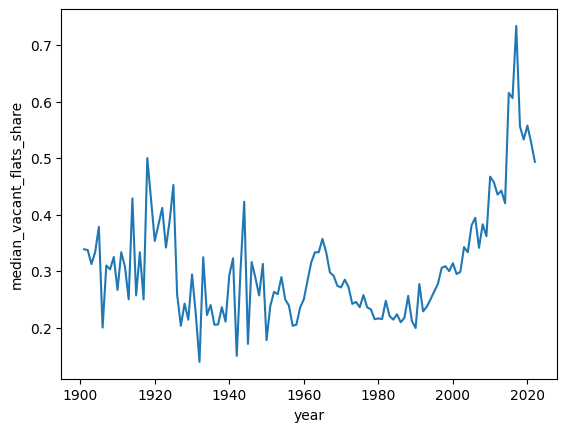

In [10]:
sns.lineplot(vac_share_by_year.loc[vac_share_by_year["year"] > 1900, ], x="year", y="median_vacant_flats_share")

In [12]:
vac_share_by_year.to_csv("data/vacant_by_year.csv", index=False)